# K-Nearest Neighbors

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

**Initialize randomly covariance and mean of our futur distribution**

In [35]:
A = np.random.rand(2, 2)
B = np.random.rand(2, 2)
covA = np.dot(A, A.transpose())
covB = np.dot(B, B.transpose())
meanA = np.random.rand(2)
meanB = np.random.rand(2)

**Initialize our training distribution**

In [36]:
train_size = 10000

dsetA = np.random.multivariate_normal(mean=meanA, cov=covA, size=(train_size, 1)).reshape(train_size, 2)
dsetB = np.random.multivariate_normal(mean=meanB, cov=covB, size=(train_size, 1)).reshape(train_size, 2)
dsetA = np.hstack((dsetA, np.zeros((dsetA.shape[0], 1))))
dsetB = np.hstack((dsetB, np.ones((dsetA.shape[0], 1))))

**Visualize**

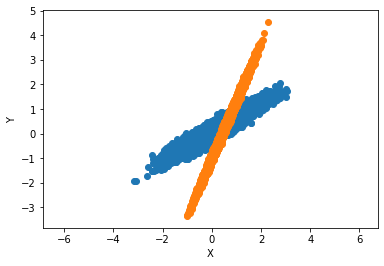

In [37]:
xA, yA = dsetA[:, :2], dsetA[:, 2]
xB, yB = dsetB[:, :2], dsetB[:, 2]
plt.scatter(xA[:, 0], xA[:, 1])
plt.scatter(xB[:, 0], xB[:, 1])
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Concat and shuffle to create our training set**

In [38]:
dset = np.concatenate((dsetA, dsetB), axis=0)
np.random.shuffle(dset)
x, y = dset[:, :2], dset[:, 2]

**Initialize our test set**

In [39]:
test_size = 50
dsetA_test = np.random.multivariate_normal(mean=meanA, cov=covA, size=(test_size, 1)).reshape(test_size, 2)
dsetB_test = np.random.multivariate_normal(mean=meanB, cov=covB, size=(test_size, 1)).reshape(test_size, 2)
dsetA_test = np.hstack((dsetA_test, np.zeros((dsetA_test.shape[0], 1))))
dsetB_test = np.hstack((dsetB_test, np.ones((dsetB_test.shape[0], 1))))

dset_test = np.concatenate((dsetA_test, dsetB_test), axis=0)
np.random.shuffle(dset_test)
x_test, y_test = dset_test[:, :2], dset_test[:, 2].astype(int)

**KNN Algorithm**  
The K-Nearest Neighbors - *among the train set* - of our test set data point predict the class thank to a majority vote.

In [40]:
k_max = 30
k_range = range(1, k_max)
y_pred_dict = {k: list() for k in k_range}
for k in k_range:
    for xi_test in x_test:
        distance =  np.sqrt((xi_test[0] - x[:, 0])**2 + (xi_test[1] - x[:, 1])**2)
        distance = np.concatenate((distance.reshape(distance.shape[0], 1), y.reshape(y.shape[0], 1)), axis=1)
        distance = distance[distance[:,0].argsort()]
        y_pred_dict[k].append(int(stats.mode(distance[:k, 1]).mode[0]))

y_pred_dict = {k: np.array(l) for k, l in y_pred_dict.items()}

**Evaluating model**

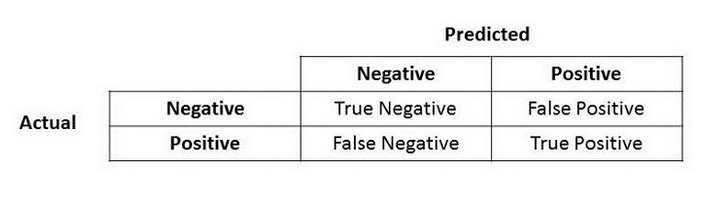

$$precision = \frac{TruePositive}{TruePositive+FalsePositive}$$  
$$recall = \frac{TruePositive}{TruePositive+FalseNegative}$$  
$$F1_{score} = 2*\frac{precision*recall}{precision+recall}$$

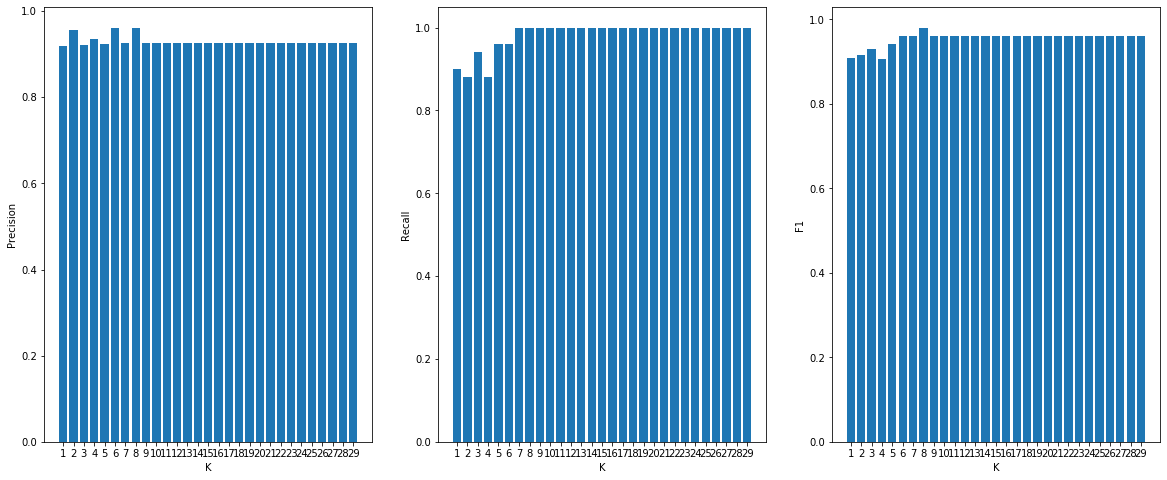

In [46]:
pos_mask = y_test == 1
neg_mask = y_test == 0
precision = list()
recall = list()
f1 = list()

for k, y_pred in y_pred_dict.items():

    TP = sum(y_test[pos_mask] == y_pred[pos_mask])
    FN = sum(y_test[pos_mask] != y_pred[pos_mask])

    TN = sum(y_test[neg_mask] == y_pred[neg_mask])
    FP = sum(y_test[neg_mask] != y_pred[neg_mask])

    precision.append(TP/(TP + FP))
    recall.append(TP/(TP + FN))
    f1.append(2*(precision[-1]*recall[-1])/(precision[-1]+recall[-1]))
    
_, ax = plt.subplots(1, 3, figsize=(20, 8))
ax[0].bar(k_range, precision, tick_label=k_range)
ax[0].set_xlabel('K')
ax[0].set_ylabel('Precision')
ax[1].bar(k_range, recall, tick_label=k_range)
ax[1].set_xlabel('K')
ax[1].set_ylabel('Recall')
ax[2].bar(k_range, f1, tick_label=k_range)
ax[2].set_xlabel('K')
ax[2].set_ylabel('F1')
plt.show()